<a href="https://colab.research.google.com/github/AmruthaReddy1397/DataScienceInternship/blob/main/TSF_task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**TASK-6: Create the Decision Tree classifier and visualize it graphically.**


####**Importing libraries and loading the dataset**

In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df=pd.read_csv('/content/sample_data/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.drop('Id', axis = 1)

In [5]:
#looking for imbalance in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


####**Exploratory Data Analysis**

In [6]:
#checking for shape
df.shape

(150, 5)

In [7]:
#checking null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


After performing above steps we can say that this dataset perfectly clean and we can proceed further with this dataset.


Now, let's plot pair plot to visualise the attributes all at once

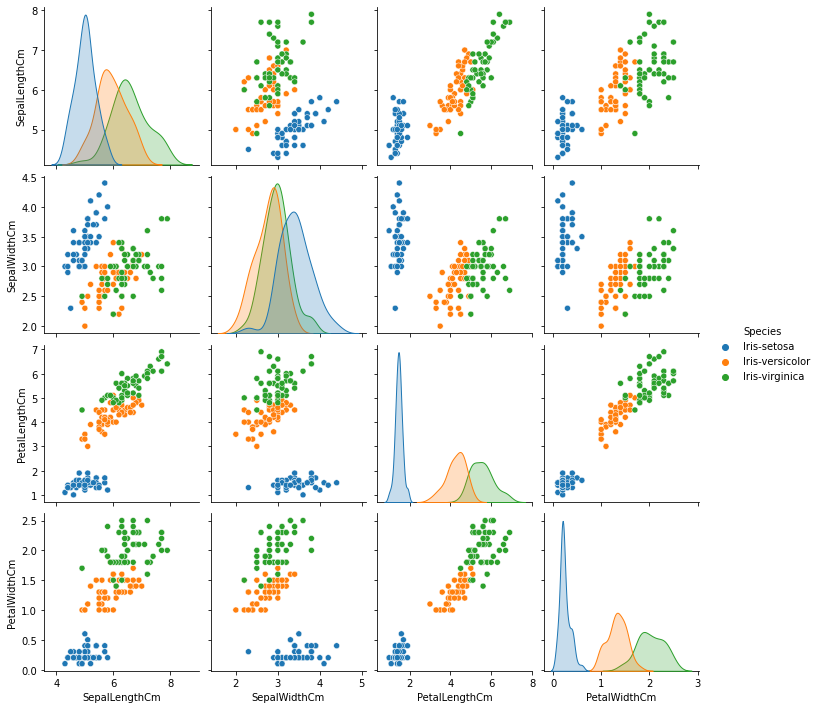

In [9]:
sns.pairplot(df, hue = 'Species')
plt.show()


Also, lets see the correaltion among the features

[]

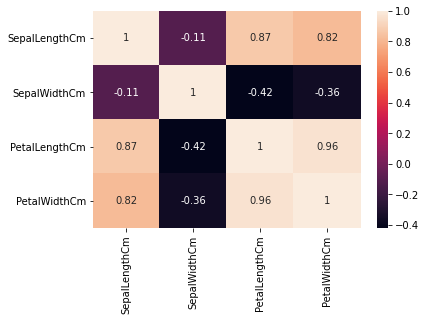

In [10]:
#correaltion matrix
sns.heatmap(df.corr(), annot = True)
plt.plot()

Observations made -

Petal length is highly related to petal width.  
Sepal length is not related to sepal width.

####**Train-test split**

In [11]:
x = df.iloc[:,[0, 1, 2, 3]].values   #attributes
y = df['Species'].values   #labels

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

####**Training the model**

In [14]:
dtree = DecisionTreeClassifier(max_depth = 2)
dtree.fit(x_train, y_train)
print("Decision Tree Classifier Created!")

Decision Tree Classifier Created!


In [15]:
#predicting the values of test data
y_pred = dtree.predict(x_test)

####**Measuring Model Perfomance**

In [16]:
score = dtree.score(x_test, y_test)
print(score)

0.8947368421052632


####**Classification Report**

In [17]:
print("Classification Report - \n", classification_report(y_test, y_pred))

Classification Report - 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.86      0.67      0.75         9

       accuracy                           0.89        38
      macro avg       0.90      0.87      0.88        38
   weighted avg       0.90      0.89      0.89        38



####**Confusion Matrix**

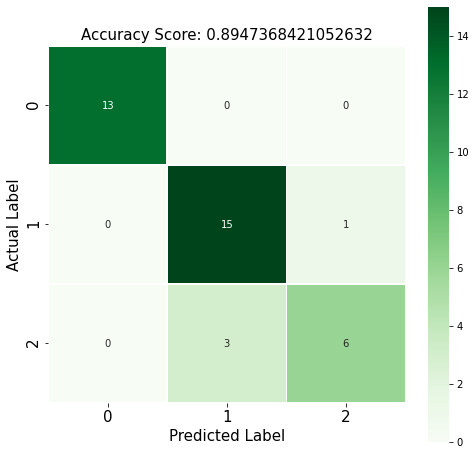

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 8))

sns.heatmap(cm, annot = True, fmt = ".0f", linewidths = 0.5, square = True, cmap = 'Greens')

plt.ylabel('Actual Label', fontsize = 15)
plt.xlabel('Predicted Label', fontsize = 15)
title = 'Accuracy Score: {0}'.format(score)
plt.title(title, size = 15)
plt.tick_params(labelsize = 15)

####**Finding the Optimal max_depth**

In [19]:
#list of values to try for max_depth
max_depth_range = list(range(1, 6))

#list to store the average RMSE for each value of max_depth
accuracy = []

for depth in max_depth_range:
    dtree = DecisionTreeClassifier(max_depth =  depth, random_state = 0)
    dtree.fit(x_train, y_train)
    
    score = dtree.score(x_test, y_test)
    accuracy.append(score)

####**Plotting accuracy score depth wise**

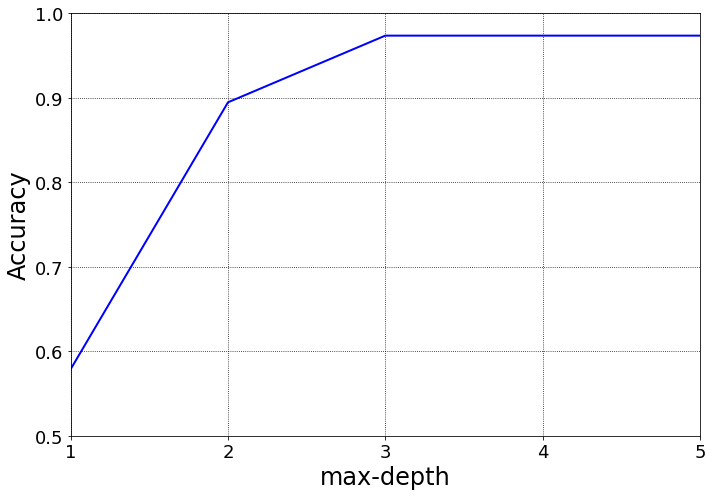

In [20]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 7))

ax.plot(max_depth_range, accuracy, lw = 2, color = 'blue')

ax.set_xlim([1, 5])
ax.set_ylim([0.5, 1.0])
ax.grid(True, axis = 'both', zorder = 0, linestyle = ':', color = 'k')

ax.tick_params(labelsize = 18)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xlabel('max-depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()


Now, as you can see the optimal max_depth is 3

In [21]:
print("Accuracy after setting max_depth=3: {0}".format(score))

Accuracy after setting max_depth=3: 0.9736842105263158


####**Visualizing the Tree**

In [22]:
# Putting the feature names and class names into variables
fn = ['Sepal length (cm)','Sepal width (cm)','Petal length (cm)','Petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

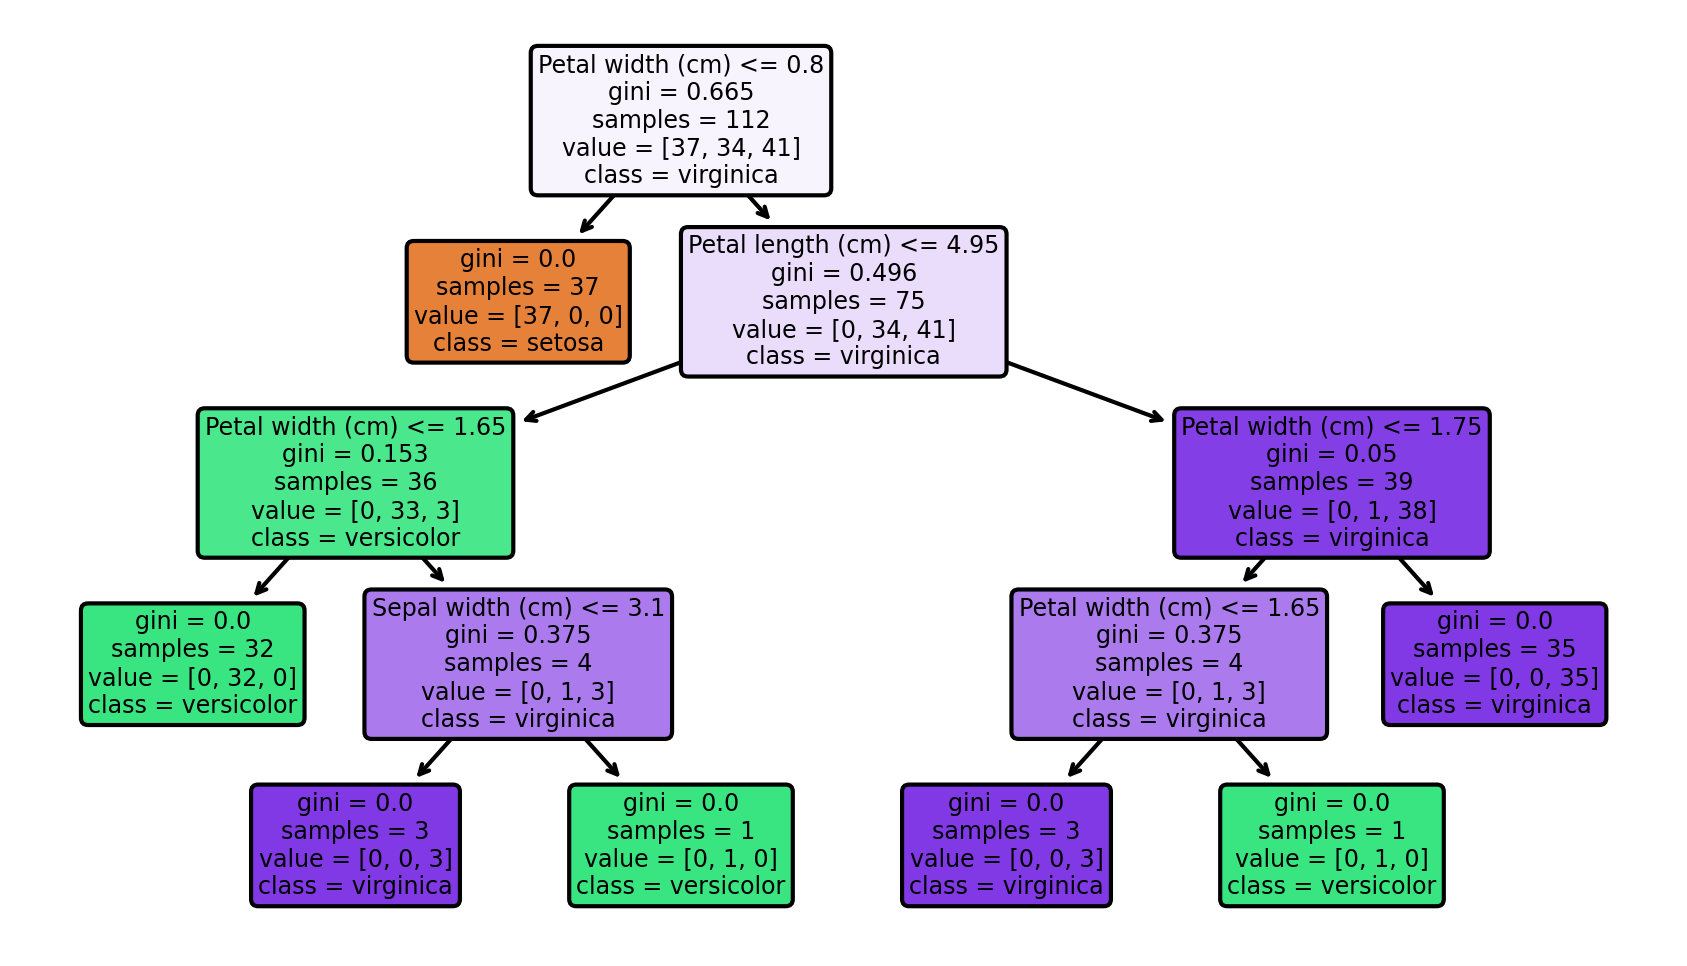

In [23]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 300)
from sklearn.tree import plot_tree
plot_tree(dtree, feature_names = fn, class_names=cn, filled = True, rounded= True);

**Conclusion:**  

After Importing, Fit our dataset in our model, accuracy is 89.47%.  
We can clearly see model performance by confusion matrix and classification report.  
By ploting accuracy score depth wise graph, optimal depth for model is 3.  
After implementing the optimal max_depth, the accuracy rises to 97.36%.

##**Thank You!**